# Stochastic Gradient Descent on Linear Regression


![image.png](gym.png)

# Table of Content
1. [**Introduction**](#1)
2. [**Exploratory Data Analysis**](#2)
3. [**Build the Model**](#3)
4. [**Visualizing Results**](#4)
5. [**Conclusion**](#5)

<a id='1'></a>
# Introduction
Are you a fitness enthusiast like me who's had enough of the crowded gym blues? I totally get it – there's nothing worse than trying to stick to your workout plan while constantly waiting for machines to free up. 

As someone who cherishes my time at the gym, I've employed  Machine Learning, specifically a robust linear regressor using Stochastic Gradient Descent, to find a solution.

**Project Goal**    
The goal of this project is to create a model that predicts gym occupancy, using a dataset with over 60,000 observations and 11 features. That way, I will be able to enjoy my exercise routine without waiting times. 

## The Dataset
The dataset contains 11 columns that contain the following information: 

* `number_people`: this is the number of people at the gym at each observation. This will be our target variable or label.
* `date`: a string value with the specific date and time information.
* `timestamp`: an integer (int), with the number of seconds since the start of the day (00:00).
* `dayofweek`: an integer (int). 0 is equal to Monday and 6 is equal to Sunday.
* `is_weekend`: a Boolean value defining if this observation happened during a weekend. 1 for yes, 0 for no.
* `is_holiday`: a Boolean value defining if the observation happened during a holiday. 1 for yes, 0 for no.
* `temperature`: a float, defining the temperature during the day of the observation in Fahrenheit.
* `isstartof_semester`: a Boolean defining if the observation happened in the first 2 weeks of a semester. 1 for yes, 0 for no.
* `is_during_semester`: a Boolean defining if the observation happened during the active semester. 1 for yes, 0 for no.
* `month`: an integer (int) defining the month of the year. 1 is equal to January, 12 is equal to December.
* `hour`: an integer (int) for the hour of the day from 0 to 23.

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='2'></a>
# Exploratory Data Analysis


In [2]:
df = pd.read_csv('data.csv')
df.head()

,number_people,date,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,37,2015-08-14 17:00:11-07:00,61211,4,0,0,71.76,0,0,8,17
1,45,2015-08-14 17:20:14-07:00,62414,4,0,0,71.76,0,0,8,17
2,40,2015-08-14 17:30:15-07:00,63015,4,0,0,71.76,0,0,8,17
3,44,2015-08-14 17:40:16-07:00,63616,4,0,0,71.76,0,0,8,17
4,45,2015-08-14 17:50:17-07:00,64217,4,0,0,71.76,0,0,8,17


In [3]:
df.shape

(62184, 11)

There are `62,184` rows and `11` columns. 
Let's get some information on each of the features we have.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62184 entries, 0 to 62183
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   number_people         62184 non-null  int64  
 1   date                  62184 non-null  object 
 2   timestamp             62184 non-null  int64  
 3   day_of_week           62184 non-null  int64  
 4   is_weekend            62184 non-null  int64  
 5   is_holiday            62184 non-null  int64  
 6   temperature           62184 non-null  float64
 7   is_start_of_semester  62184 non-null  int64  
 8   is_during_semester    62184 non-null  int64  
 9   month                 62184 non-null  int64  
 10  hour                  62184 non-null  int64  
dtypes: float64(1), int64(9), object(1)
memory usage: 5.2+ MB


Most of the data is numeric and integers, with the exception of `temperature`, which is a float, and the `date` object.    
Let's explore the numeric variables further. 

In [5]:
df.describe()

,number_people,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
count,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000
mean,29.072543,45799.437958,2.982504,0.282870,0.002573,58.557108,0.078831,0.660218,7.439824,12.236460
std,22.689026,24211.275891,1.996825,0.450398,0.050660,6.316396,0.269476,0.473639,3.445069,6.717631
min,0.000000,0.000000,0.000000,0.000000,0.000000,38.140000,0.000000,0.000000,1.000000,0.000000
25%,9.000000,26624.000000,1.000000,0.000000,0.000000,55.000000,0.000000,0.000000,5.000000,7.000000
50%,28.000000,46522.500000,3.000000,0.000000,0.000000,58.340000,0.000000,1.000000,8.000000,12.000000
75%,43.000000,66612.000000,5.000000,1.000000,0.000000,62.280000,0.000000,1.000000,10.000000,18.000000
max,145.000000,86399.000000,6.000000,1.000000,1.000000,87.170000,1.000000,1.000000,12.000000,23.000000


* We have binary features like `is_weekend`, `is_holiday`, `is_start_of_semester`, `is_during_semester`
* We have a maximum of `145` people at the gym in an observation and a median of `28` people.
* The `timestamp` column seems to be weird to work with. We will clean this later.

Let's see if we have null values in the data.

In [6]:
df.isna().sum()

number_people           0
date                    0
timestamp               0
day_of_week             0
is_weekend              0
is_holiday              0
temperature             0
is_start_of_semester    0
is_during_semester      0
month                   0
hour                    0
dtype: int64

There are no null values in the dataset.

We already have other features in our dataset which give us the specific day and time, therefore we can drop the date column. 

In [7]:
df.drop('date', axis=1, inplace=True)
df.head()

,number_people,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,37,61211,4,0,0,71.76,0,0,8,17
1,45,62414,4,0,0,71.76,0,0,8,17
2,40,63015,4,0,0,71.76,0,0,8,17
3,44,63616,4,0,0,71.76,0,0,8,17
4,45,64217,4,0,0,71.76,0,0,8,17


Let's do a univariate analysis on some of the features, by looking at the distributions of the specific features. 
We will start with `month`, `day`, and `hour` since they probably have the largest influence on the number of people.

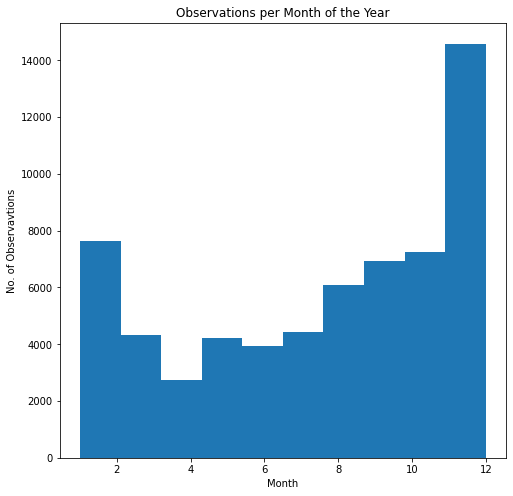

In [8]:
plt.figure(figsize=(8, 8))

plt.hist(df['month'])
plt.title("Observations per Month of the Year")
plt.xlabel('Month')
plt.ylabel('No. of Observavtions')
plt.show()

* `December` and `January` are the months with the most observations, probably because they are the most popular months to go to the gym.
* We have more observations at the beginning of the semester(`August`), than at the end, probably because everyone is very excited at the beginning and very busy at the end (`March, April`).

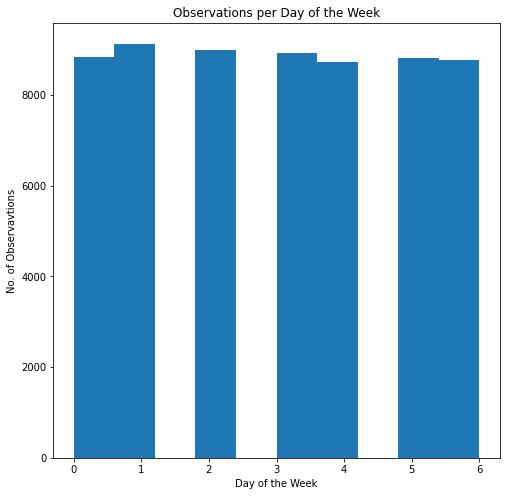

In [9]:
plt.figure(figsize=(8, 8))

plt.hist(df['day_of_week'])
plt.title("Observations per Day of the Week")
plt.xlabel('Day of the Week')
plt.ylabel('No. of Observavtions')
plt.show()

This plot looks strange, which sometimes happens with plots. We will replot it using a distribution plot. 

<Figure size 576x576 with 0 Axes>

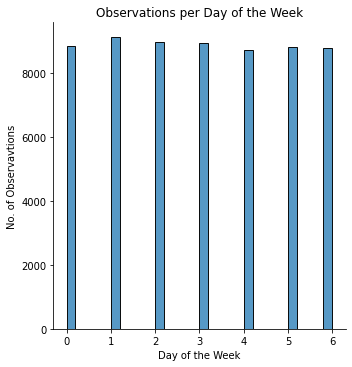

In [10]:
plt.figure(figsize=(8, 8))

sns.displot(df['day_of_week'])
plt.title("Observations per Day of the Week")
plt.xlabel('Day of the Week')
plt.ylabel('No. of Observavtions')
plt.show()

There is no huge difference in the number of observations for each day of the week. `Tuesday`(1) seems to be the most common day, but not by much.

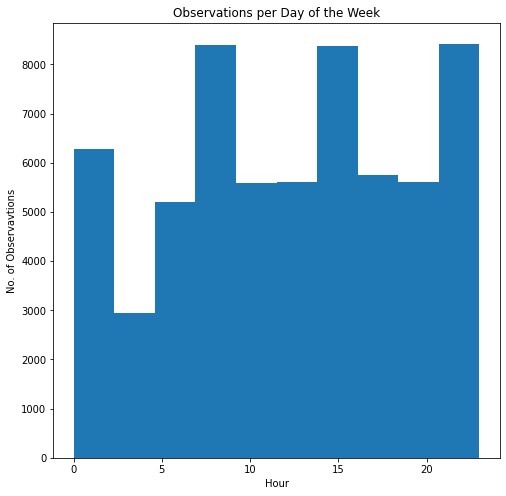

In [11]:
plt.figure(figsize=(8, 8))

plt.hist(df['hour'])
plt.title("Observations per Day of the Week")
plt.xlabel('Hour')
plt.ylabel('No. of Observavtions')
plt.show()

* There are a lot of observations at `early morning` and `mid afternoon`, which is expected, but the one at `midnight` is a surprise. There seems to be night owls who go to the gym at this time.

Let's now conduct bivariate analysis, looking at the relations between the above variables compared to the number of people. 

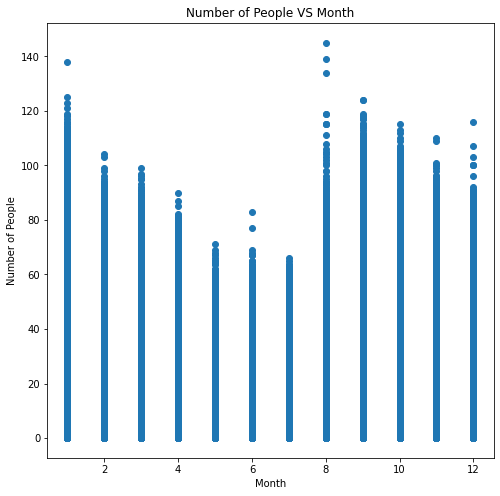

In [12]:
plt.figure(figsize=(8, 8))

plt.scatter(df['month'], df['number_people'])
plt.title("Number of People VS Month")
plt.xlabel('Month')
plt.ylabel('Number of People')
plt.show()

* We can see that `August` and `January` are the months with the bigger peaks of people.
* Clearly, the beginning of the semester has larger peaks than the end of it.

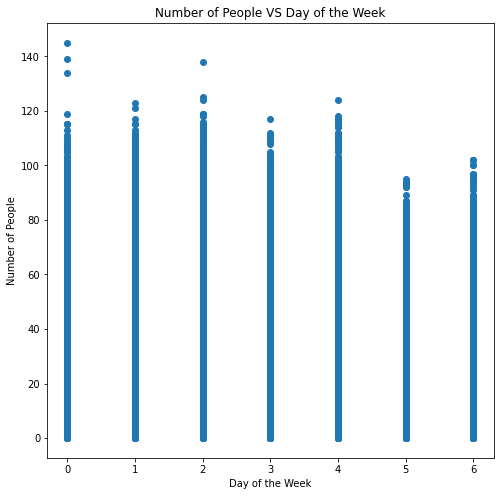

In [13]:
plt.figure(figsize=(8, 8))

plt.scatter(df['day_of_week'], df['number_people'])
plt.title("Number of People VS Day of the Week")
plt.xlabel('Day of the Week')
plt.ylabel('Number of People')
plt.show()

* Largest peaks are on `Monday` and `Wednesday`.
* We have lower peaks on `Saturday` and `Sunday`.

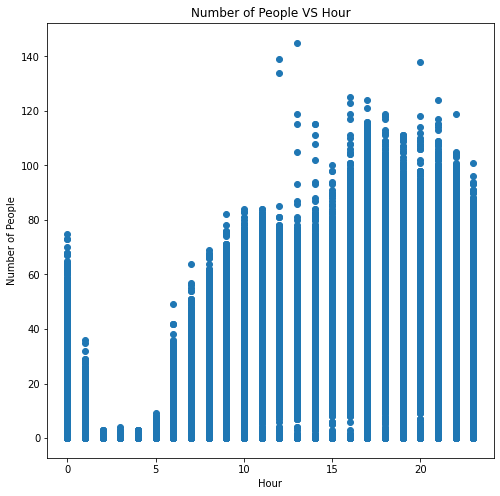

In [14]:
plt.figure(figsize=(8, 8))

plt.scatter(df['hour'], df['number_people'])
plt.title("Number of People VS Hour")
plt.xlabel('Hour')
plt.ylabel('Number of People')
plt.show()

* It is clearer that the largest peaks of people are during the `afternoon`, `evening`, and `late at night`.
* We see very small peaks from `2am` to `5am`.

Let's look at correlations between our variables and the target.

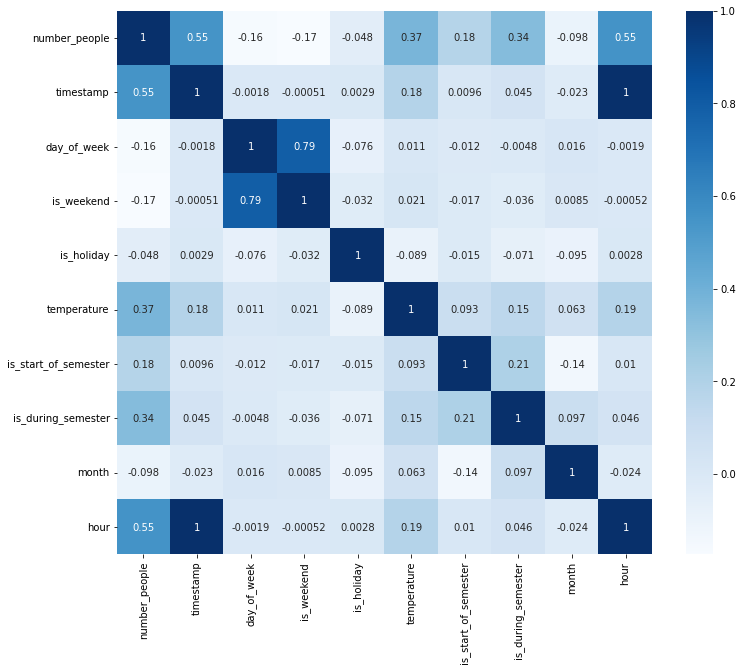

In [15]:
correlations = df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(correlations, annot=True, cmap='Blues')
plt.show()

* `hour`, `temperature` and `is_during_semester` variables have the largest weight. 
* Other variables have weaker correlations as well, like `is_weekend` and `day_of_week` are negatively correlated which is very interesting.
* `timestamp` and `hour` variables have a very similar weight, which means they could be redundant.
 
Let's remove the `timestamp` column before moving on to build the model.

In [16]:
df.drop('timestamp', axis=1, inplace=True)
df.head()

,number_people,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,37,4,0,0,71.76,0,0,8,17
1,45,4,0,0,71.76,0,0,8,17
2,40,4,0,0,71.76,0,0,8,17
3,44,4,0,0,71.76,0,0,8,17
4,45,4,0,0,71.76,0,0,8,17


<a id='3'></a>
# Build the Model
Now that the dataset is ready and we have our features, we will build the model. Let's import the libraries we will be using. 

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor

We first need to split the data into train and test sets. We will use a test size of 30% and train size of 70%.


In [18]:
data = df.values
X = data[:, 1:]
y = data[:, 0] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [19]:
sgd_v1 = SGDRegressor(alpha=0.0001, learning_rate='optimal',
                     loss='huber', penalty='elasticnet',
                     random_state=52)
sgd_v1.fit(X_train, y_train)

SGDRegressor(learning_rate='optimal', loss='huber', penalty='elasticnet',
             random_state=52)

## Model Performance
Now that we have trained our model, we will predict the target variable with the test data. We will be using `MSE`, `MAE` and `R Squared`.

In [20]:
y_pred_v1 = sgd_v1.predict(X_test)

In [21]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# mse
print(f"Mean squared error: {round( mean_squared_error(y_test, y_pred_v1),3)}")
# r_squared
print(f"R2 score: {round(r2_score(y_test, y_pred_v1),3)}")
# mae
print(f"Mean absolute error: { round(mean_absolute_error(y_test, y_pred_v1),3)}")

Mean squared error: 254.545
R2 score: 0.506
Mean absolute error: 12.135


* MSE and MAE are fairly high (closer to 0, the higher the accuracy), meaning the model is not incredibly accurate
* With the R2 score, we can see there is a correlation of 0.506, which is not terrible, but not good either since we want it to be as close to 1 as possible. 

To try and improve the model, we can scale the features to normalize them from -1 to 1. 

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
sgd_v2 = SGDRegressor(alpha=0.0001, learning_rate='optimal',
                     loss='huber', penalty='elasticnet',
                     random_state=52)

sgd_v2.fit(X_train_scaled, y_train)

SGDRegressor(learning_rate='optimal', loss='huber', penalty='elasticnet',
             random_state=52)

In [24]:
y_pred_v2 = sgd_v2.predict(X_test_scaled)

In [25]:
# mse
print(f"Mean squared error: {round( mean_squared_error(y_test, y_pred_v2),3)}")
# r_squared
print(f"R2 score: {round(r2_score(y_test, y_pred_v2),3)}")
# mae
print(f"Mean absolute error: { round(mean_absolute_error(y_test, y_pred_v2),3)}")

Mean squared error: 254.325
R2 score: 0.507
Mean absolute error: 12.049


With the scaled data, the model performs slightly better, decreasing the MSE and MAE, and increasing the R2 score by 0.001.

<a id='4'></a>
# Visualizing the Results
To see how our model performs, the best way is to visualize it. Here is the plot from our first model, using line plots with the actual test data on the back and the predicted data on the front. The parts where the plots converge are the points where the model performed well, and the divergence in the plots is where the model performed poorly.

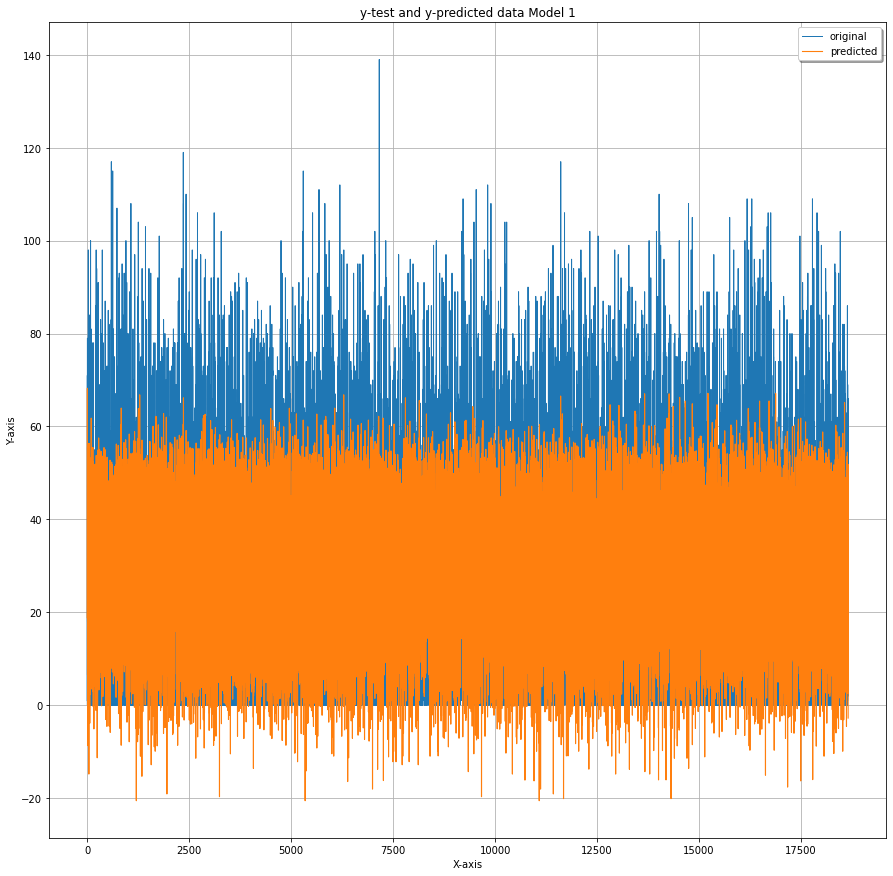

In [26]:
plt.figure(figsize=(15, 15))

x_ax = range(len(y_test))
plt.plot(x_ax, y_test, linewidth=1, label="original")
plt.plot(x_ax, y_pred_v1, linewidth=1.1, label="predicted")
plt.title("y-test and y-predicted data Model 1")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

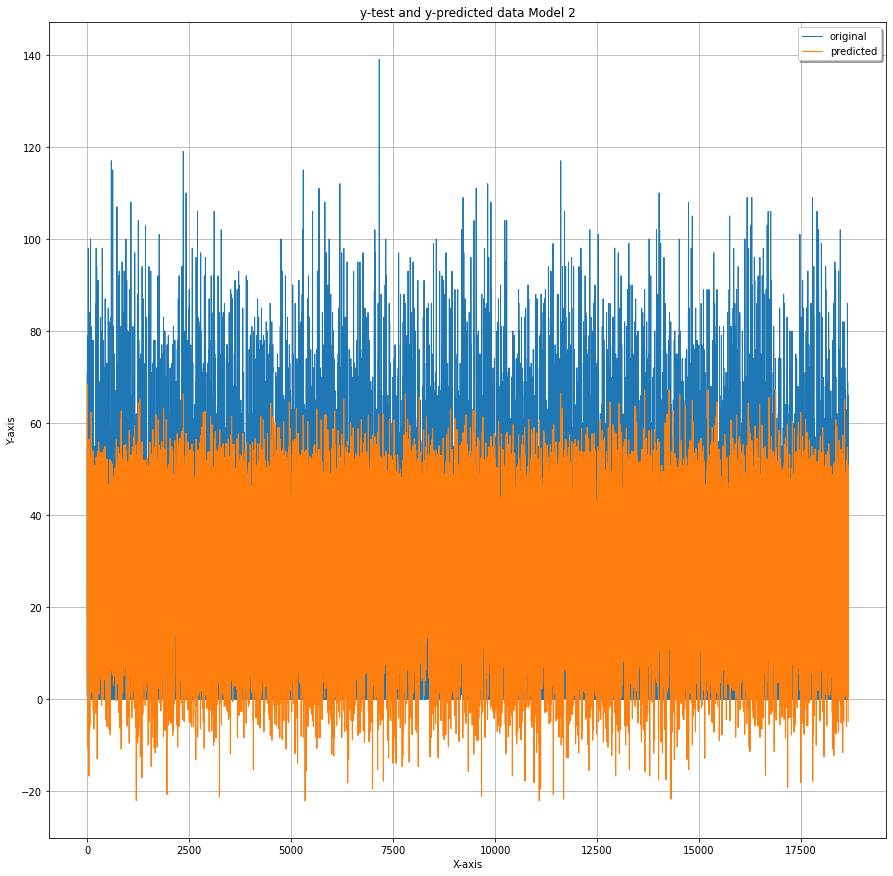

In [27]:
# Model v2

plt.figure(figsize=(15, 15))

x_ax = range(len(y_test))
plt.plot(x_ax, y_test, linewidth=1, label="original")
plt.plot(x_ax, y_pred_v2, linewidth=1.1, label="predicted")
plt.title("y-test and y-predicted data Model 2")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

<a id='5'></a>
# Conclusion
We can clearly see there is a lot of room for improvement. However, a linear regression model using Stochastic Gradient Descent is a good place to start or building such a prediction model. We can improve the model by making some changes. 

In general, from the data and the model, for someone like me who likes to go to the gym often without having too many people there, any day at `5am` seems like a safe bet. 